In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# create DF
data = np.loadtxt('pca-data.txt')
df = pd.DataFrame(data, columns=["X", "Y","Z"])

PART 1: Coding PCA from Scratch

           X          Y          Z
X  81.241998 -15.840814  31.668405
Y -15.840814  13.701814 -15.264450
Z  31.668405 -15.264450  31.366771
[101.61980038  19.89921519   4.79156808]
[[ 0.86667137 -0.4962773  -0.0508879 ]
 [-0.23276482 -0.4924792   0.83862076]
 [ 0.44124968  0.71496368  0.54233352]]
[101.61980038  19.89921519   4.79156808]
[[ 0.86667137 -0.4962773  -0.0508879 ]
 [-0.23276482 -0.4924792   0.83862076]
 [ 0.44124968  0.71496368  0.54233352]]
[[ 0.86667137 -0.4962773 ]
 [-0.23276482 -0.4924792 ]
 [ 0.44124968  0.71496368]]
[[ 10.87667009 -12.68609992   0.43255106 ...  -2.92254009  11.18317124
   14.2299014 ]
 [  7.37396173  -4.24879151   0.26700852 ...   2.41914881   4.20349275
    5.64409544]]
AxesSubplot(0.125,0.125;0.775x0.755)


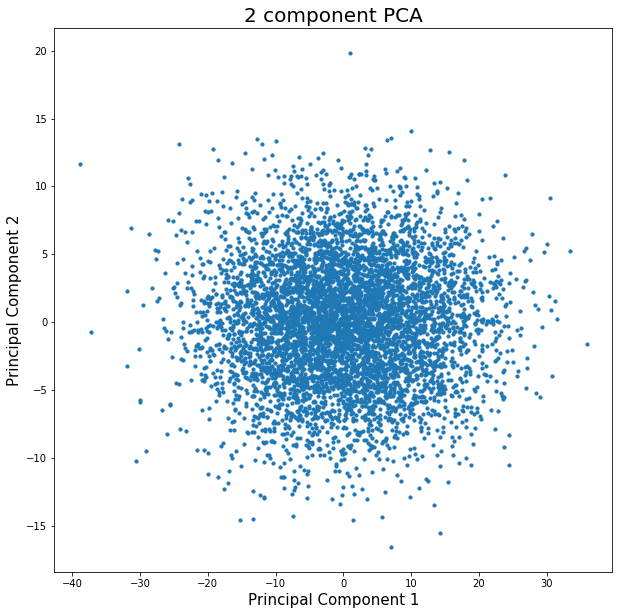

In [3]:
# Step 0: normalize data by calculating mean and subtracting data point by mean
mu = df.mean(axis=0)

# create new DF with centered/normalized data
new_df = df.subtract(mu, axis=1)

# Step 1: compute covariance matrix
cov_matrix = new_df.cov()
print(cov_matrix)

# Step 2: compute eigenvalue and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

# sort eigenvalues and eigenvectors in decreasing order
order = eigenvalues.argsort()[::-1]   
descending_order_eigenvalues = eigenvalues[order]
descending_order_eigenvectors = eigenvectors[:,order]
print(descending_order_eigenvalues)
print(descending_order_eigenvectors)

# truncate matrix to n x k dimensions 
tr_matrix = np.delete(descending_order_eigenvectors, 2, axis = 1)
print(tr_matrix)

# projecting transposed truncated eigenvector matrix to original datapoints to form principal components
principal_components2 = (tr_matrix.T).dot(new_df.T)
print(principal_components2)

# visualize principal components as pd df to compare with library results
principal_df2 = pd.DataFrame(principal_components2.T, columns = ['principal component 1', 'principal component 2'])
principal_df2 
# Results are the same!! WOOHOO!!

# visualizing 2D projection

fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(1,1,1) 
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)

ax2.scatter(principal_df2['principal component 1'], principal_df2['principal component 2'], s=10)

print(ax2)
# Note that graph of the code from scratch is same as the graph from the use of libraries, but is exact mirror image because the signs of the eigenvectors can be either positive or negative.


PART 2: Implementing PCA using library

In [4]:
''' We decided to not normalize the data points by standard scale
because the scales of the features/coordinates are similar, 
where the datapoints only range in the tens.
Therefore we will normalize according to what the Professor taught in class:
By subtracting the mean from each of the data dimensions.
(We are also aware there are other ways to "normalize" data: standardizing, normalizing, scaling)
# StandardizeScaler.() = Standardize features by removing the mean and scaling to unit variance. In other words, standardize where the mean of each column equals 0 and the SD is 1.
# # scale features
# features = ["X", "Y","Z"]

# # Separating out the features
# x = df.loc[:, features].values

# # Standardizing the features
# x = StandardScaler().fit_transform(x)'''

# Center data by subtracting data point by mean
mu = df.mean(axis=0)
centered_df = df.subtract(mu, axis=1)


#PCA 3D to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(centered_df)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

print(principal_df)

      principal component 1  principal component 2
0                -10.876670               7.373962
1                 12.686100              -4.248792
2                 -0.432551               0.267009
3                  6.192442              -0.369839
4                -13.482977              -1.655150
5                  0.094842              -1.909424
6                 18.597238              -4.435651
7                 -8.133362               0.140160
8                 -7.178859               0.990978
9                 16.431421              -7.307489
10                -2.278511              10.895239
11                -9.108336              -4.327445
12                -1.861998              -5.420014
13                -6.921833               3.569138
14                 4.498636              -1.113589
15                 5.016617              -3.125512
16                 6.555711               7.151675
17               -11.901133               2.140948
18                -6.446126    

AxesSubplot(0.125,0.125;0.775x0.755)


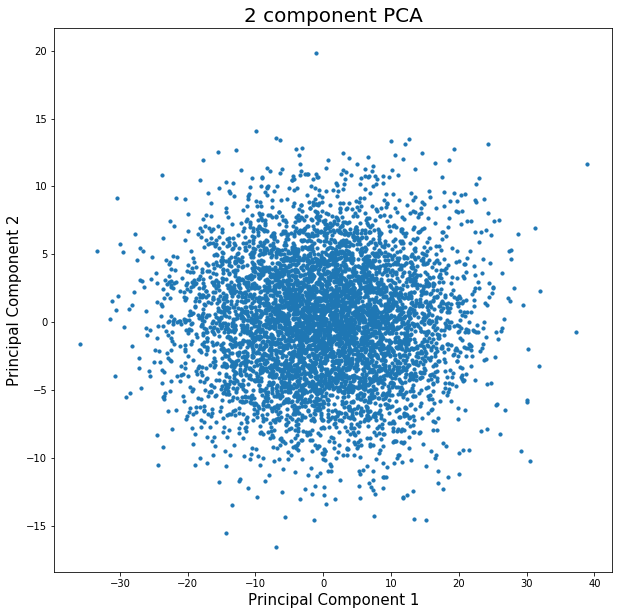

In [5]:
# visualizing 2D projection

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principal_df['principal component 1'], principal_df['principal component 2'], s=10)

print(ax)